<a href="https://colab.research.google.com/github/Jayasri4002/laptopprices/blob/main/Copy_of_laptop_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load datset


In [ ]:
import pandas as pd
df = pd.read_csv('/content/laptop_prices.csv')


In [ ]:
df.head()      # shows first 5 rows
df.shape       # shows number of rows and columns
df.info()      # shows column names and data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [ ]:
import os
os.path.exists('/content/laptop_prices.csv')


True

In [ ]:
!ls /content


laptop_prices.csv  sample_data


NO OF COLUMNS


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/laptop_prices.csv')

# Print all column names
print("Columns in the dataset:")
print(df.columns.tolist())



Columns in the dataset:
['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight', 'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model', 'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company', 'GPU_model']


Import libraries

In [ ]:
# -------------------------------
# 1. Import Libraries
# -------------------------------
import pandas as pd          # for data handling
import numpy as np           # for numerical operations
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns        # for advanced visualizations


Data Preprocessing

In [ ]:
# -------------------------------
# 2. Data Preprocessing
# -------------------------------

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('/content/laptop_prices.csv')

# ----- 1. Handle Missing Values -----
print("Missing values before handling:\n", df.isnull().sum())
df = df.fillna(df.mean(numeric_only=True))    # fill numeric columns with mean
df = df.fillna(df.mode().iloc[0])             # fill categorical columns with mode

# ----- 2. Convert Categorical Data to Numerical -----
# Using Label Encoding for simple categorical columns
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# ----- 3. One-Hot Encoding (optional, better for ML models) -----
# df = pd.get_dummies(df, drop_first=True)

# ----- 4. Feature Selection -----
# Example: separate input features (X) and target variable (y)
X = df.drop('Price_euros', axis=1)   # independent features
y = df['Price_euros']                # dependent variable

# Display results
print("\nAfter preprocessing:")
print(df.info())
print("\nFeature matrix shape:", X.shape)
print("Target variable shape:", y.shape)


Missing values before handling:
 Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

After preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   int64  
 1   Product               1275 non-null   int64  
 2   TypeName          

Train_Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (1020, 22)
Test shape: (255, 22)


In [ ]:
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)


Train the model

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train (fit) the model on training data
model.fit(X_train, y_train)


LinearRegression()

Make Prediction

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Display first few predictions
print("Predicted Prices:", y_pred[:10])


Predicted Prices: [ 605.1869299   932.67006773 1530.85778203  939.70091451 1831.41210589
  957.45389469  958.51720535  310.09394846 1955.66702779  767.90265741]


Compare with Actual Prices

In [ ]:
# Compare actual vs predicted
comparison = pd.DataFrame({
    "Actual Price": y_test.values,
    "Predicted Price": y_pred
})

print(comparison.head(10))


   Actual Price  Predicted Price
0        650.00       605.186930
1        716.00       932.670068
2       1584.00      1530.857782
3       1020.00       939.700915
4       1749.00      1831.412106
5        557.37       957.453895
6        999.00       958.517205
7        330.00       310.093948
8       2267.86      1955.667028
9        682.00       767.902657


Predict on new data

In [ ]:
# Example new data (must match your X columns)
new_data = pd.DataFrame({
    "Brand": ["Dell"],
    "RAM": [16],
    "Storage": [512],
    "Processor": ["Intel i7"]
})

# Encode and align with training columns
new_data = pd.get_dummies(new_data, drop_first=True).reindex(columns=X_train.columns, fill_value=0)

# Predict price
predicted_price = model.predict(new_data)
print("Predicted Price for new laptop:", predicted_price[0])


Predicted Price for new laptop: -814.9962283478719


Evaluate the Model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Display results
print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 128178.69
Root Mean Squared Error (RMSE): 358.02
R-squared (R²): 0.7418


Visualize result

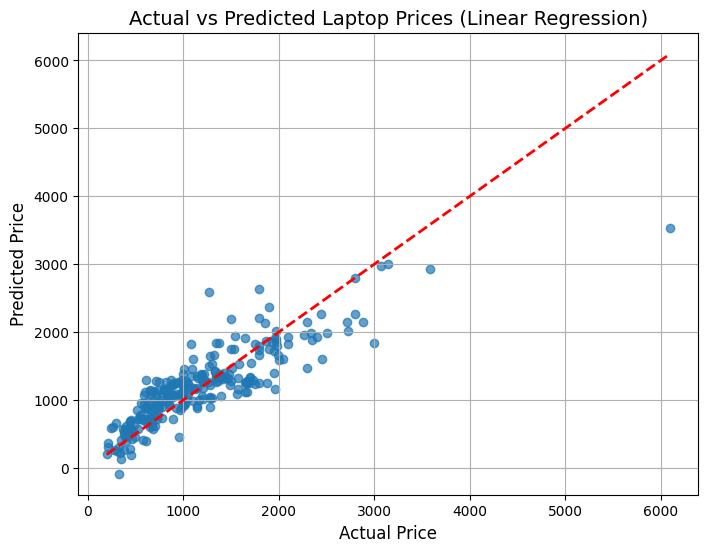

In [ ]:
import matplotlib.pyplot as plt

# Plot predicted vs actual values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Price", fontsize=12)
plt.ylabel("Predicted Price", fontsize=12)
plt.title("Actual vs Predicted Laptop Prices (Linear Regression)", fontsize=14)
plt.grid(True)

# Line of perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.show()


Random Forest,XGBoost

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=200),
    "XGBoost": XGBRegressor(random_state=42, n_estimators=200, learning_rate=0.1)
}

# Train, predict, and evaluate
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MSE": mse, "RMSE": rmse, "R2": r2}

# Display results
print("Model Comparison Results:\n")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  R² = {metrics['R2']:.4f}")
    print(f"  RMSE = {metrics['RMSE']:.2f}")
    print(f"  MSE = {metrics['MSE']:.2f}\n")


Model Comparison Results:

Linear Regression:
  R² = 0.7418
  RMSE = 358.02
  MSE = 128178.69

Random Forest:
  R² = 0.8763
  RMSE = 247.82
  MSE = 61416.93

XGBoost:
  R² = 0.9105
  RMSE = 210.79
  MSE = 44431.67



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/content/laptop_prices.csv')
data.head()


,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [ ]:
data.isnull().sum()


,0
Company,0
Product,0
TypeName,0
Inches,0
Ram,0
OS,0
Weight,0
Price_euros,0
Screen,0
ScreenW,0


In [ ]:
data.describe()


,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


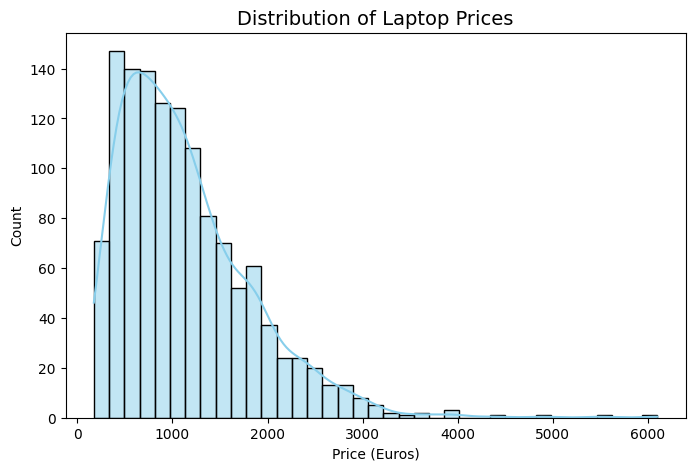

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data['Price_euros'], kde=True, color='skyblue')
plt.title('Distribution of Laptop Prices', fontsize=14)
plt.xlabel('Price (Euros)')
plt.ylabel('Count')
plt.show()


/tmp/ipython-input-2865572196.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.index, y=top_companies.values, palette='viridis')


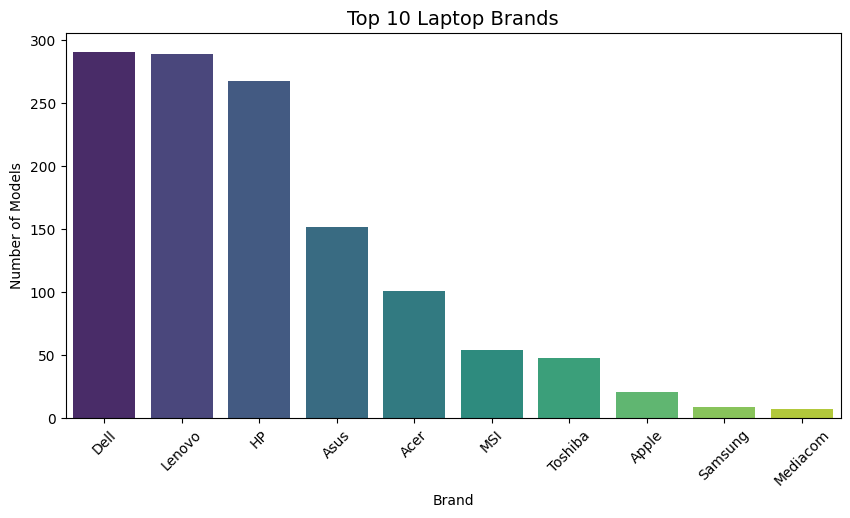

In [ ]:
plt.figure(figsize=(10,5))
top_companies = data['Company'].value_counts().head(10)
sns.barplot(x=top_companies.index, y=top_companies.values, palette='viridis')
plt.title('Top 10 Laptop Brands', fontsize=14)
plt.xlabel('Brand')
plt.ylabel('Number of Models')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd

# Read your dataset
data = pd.read_csv('/content/laptop_prices.csv')

# Display only 5 rows and 23 columns
data.iloc[:5, :23]


,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [ ]:
# Importing libraries
import pandas as pd

# Loading the dataset
data = pd.read_csv('/content/laptop_prices.csv')

# Ensuring all 23 columns are displayed side-by-side
pd.set_option('display.max_columns', 23)
pd.set_option('display.width', 2000)

# Display first 5 rows (exactly like the screenshot)
data.head()


,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,No,No,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


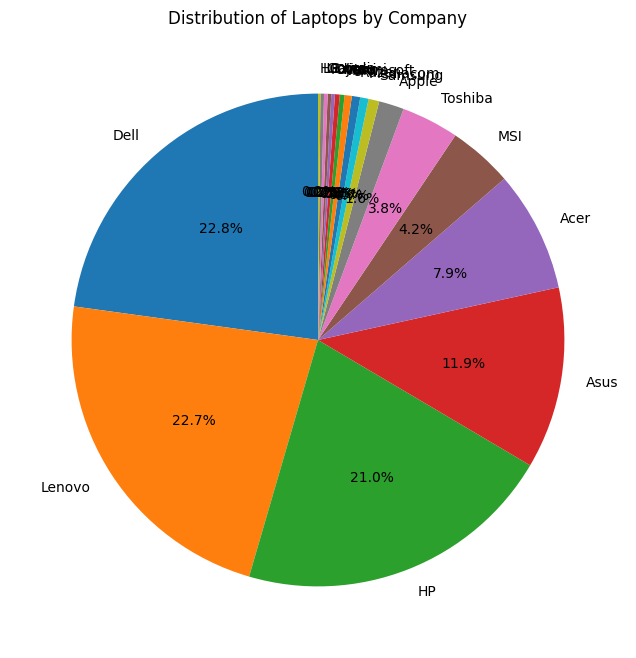

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv("laptop_prices.csv")

# Count how many laptops each company has
company_counts = df['Company'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(company_counts, labels=company_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Laptops by Company")
plt.show()


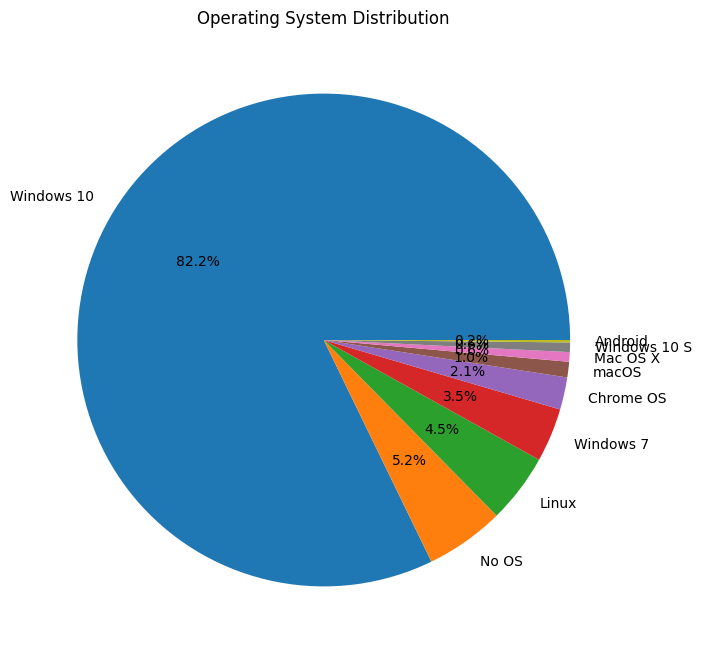

In [ ]:
df['OS'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8), title='Operating System Distribution')
plt.ylabel('')
plt.show()


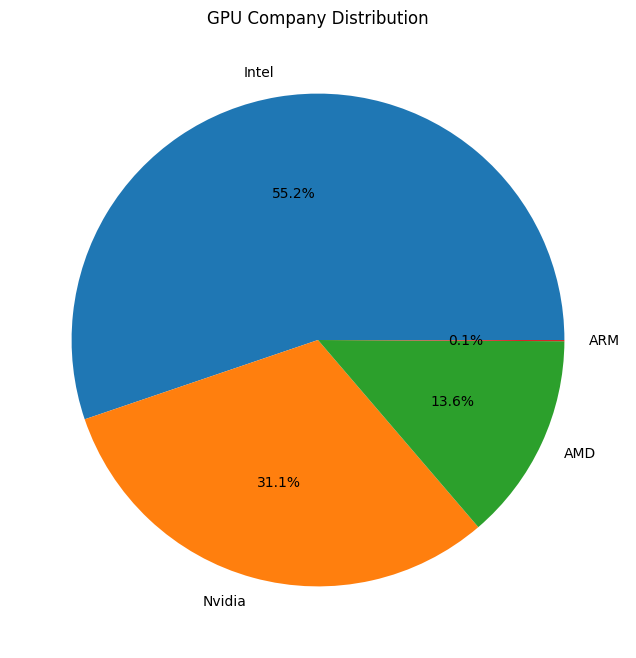

In [ ]:
df['GPU_company'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8), title='GPU Company Distribution')
plt.ylabel('')
plt.show()


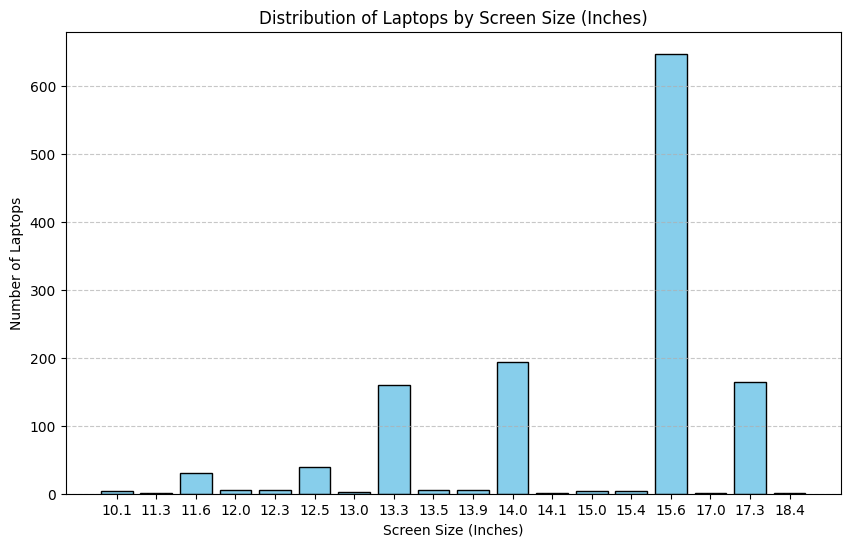

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv("laptop_prices.csv")

# Count laptops by screen size
inches_counts = df['Inches'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(inches_counts.index.astype(str), inches_counts.values, color='skyblue', edgecolor='black')
plt.title("Distribution of Laptops by Screen Size (Inches)")
plt.xlabel("Screen Size (Inches)")
plt.ylabel("Number of Laptops")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


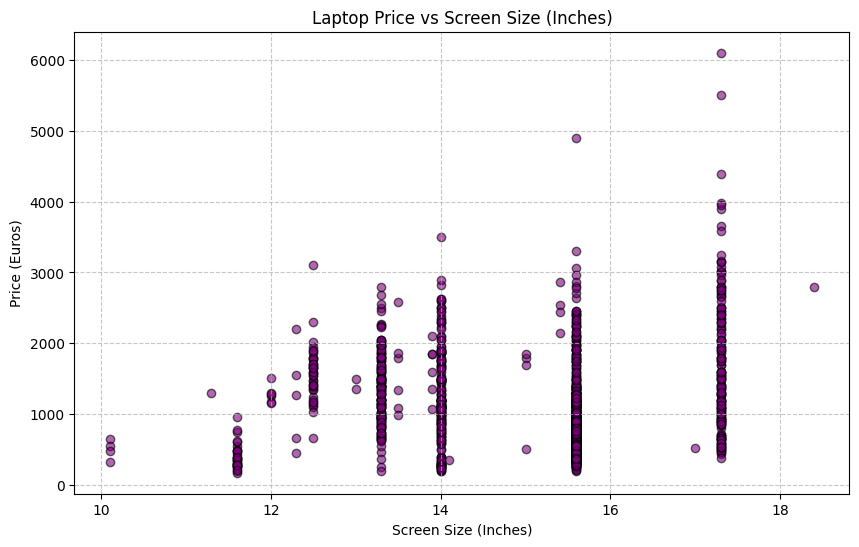

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read dataset
df = pd.read_csv("laptop_prices.csv")

plt.figure(figsize=(10, 6))
plt.scatter(df['Inches'], df['Price_euros'], color='purple', alpha=0.6, edgecolors='black')
plt.title("Laptop Price vs Screen Size (Inches)")
plt.xlabel("Screen Size (Inches)")
plt.ylabel("Price (Euros)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Average Price vs Secondary Storage Type

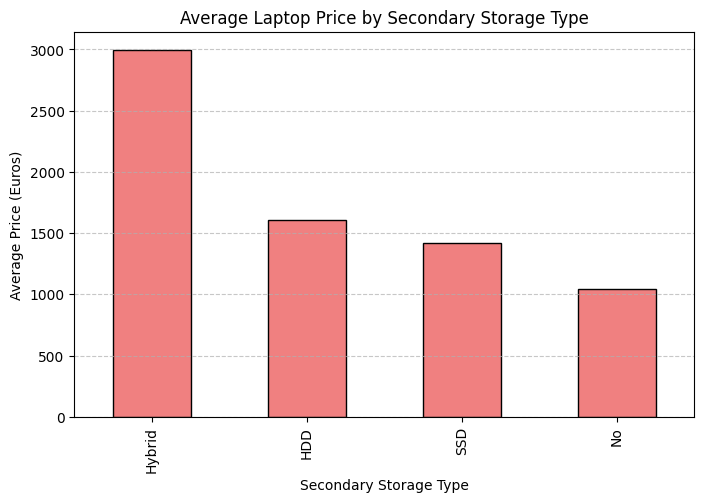

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read dataset
df = pd.read_csv("laptop_prices.csv")

# Group by SecondaryStorageType and find mean price
storage_price = df.groupby('SecondaryStorageType')['Price_euros'].mean().sort_values(ascending=False)

# Bar chart
plt.figure(figsize=(8, 5))
storage_price.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Average Laptop Price by Secondary Storage Type")
plt.xlabel("Secondary Storage Type")
plt.ylabel("Average Price (Euros)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Box Plot: Price vs Secondary Storage Type

/tmp/ipython-input-869748891.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='SecondaryStorageType', y='Price_euros', palette='Set2')


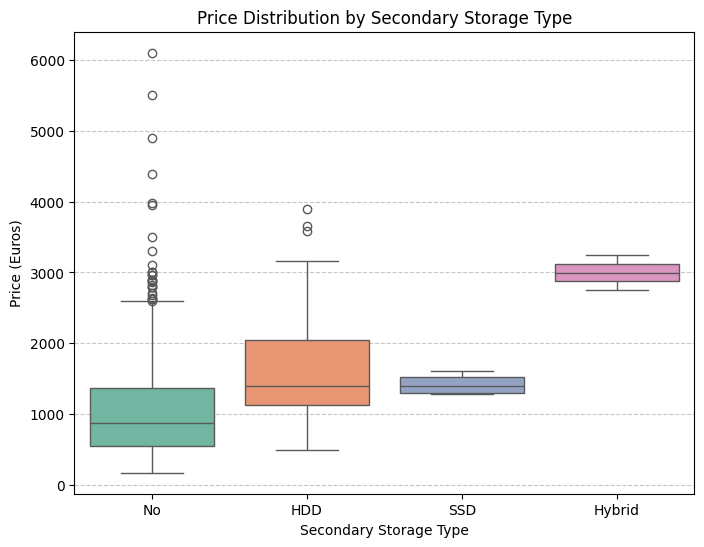

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read dataset
df = pd.read_csv("laptop_prices.csv")

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='SecondaryStorageType', y='Price_euros', palette='Set2')

plt.title("Price Distribution by Secondary Storage Type")
plt.xlabel("Secondary Storage Type")
plt.ylabel("Price (Euros)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Boxplot grouped by Company (to compare inside each brand):

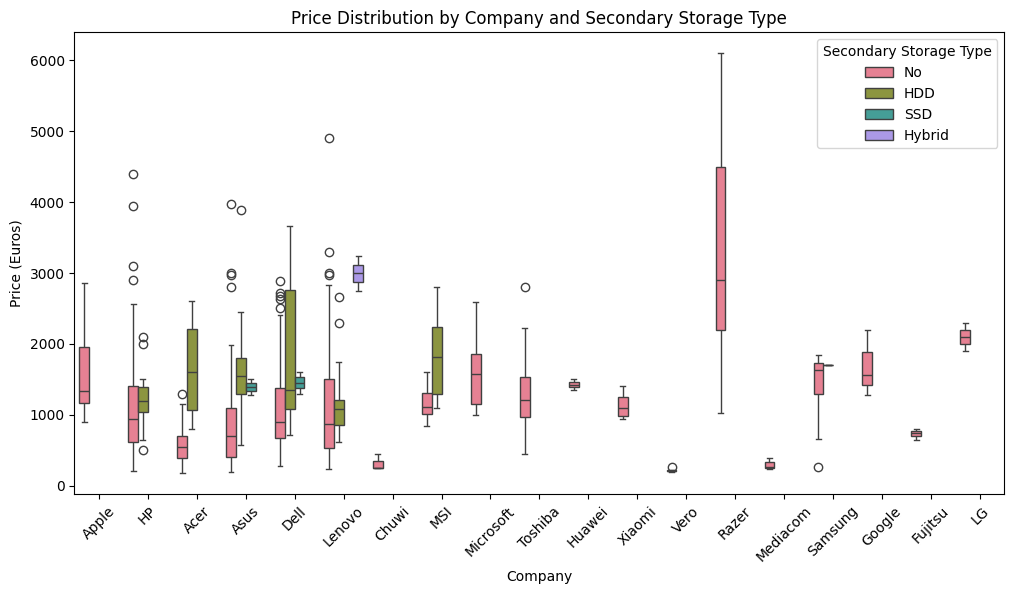

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Company', y='Price_euros', hue='SecondaryStorageType', palette='husl')
plt.title("Price Distribution by Company and Secondary Storage Type")
plt.xlabel("Company")
plt.ylabel("Price (Euros)")
plt.xticks(rotation=45)
plt.legend(title="Secondary Storage Type")
plt.show()


Boxplot for Screen Size vs Price, colored by SecondaryStorageType:

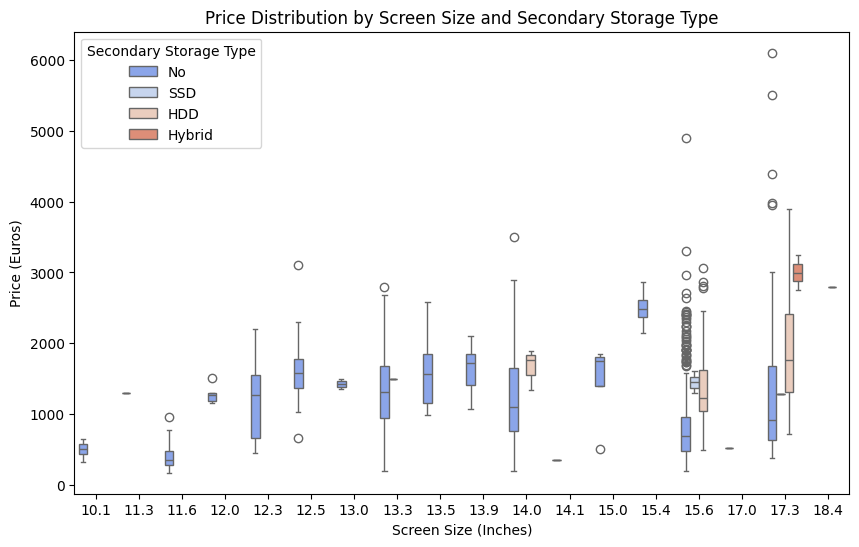

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Inches', y='Price_euros', hue='SecondaryStorageType', palette='coolwarm')
plt.title("Price Distribution by Screen Size and Secondary Storage Type")
plt.xlabel("Screen Size (Inches)")
plt.ylabel("Price (Euros)")
plt.legend(title="Secondary Storage Type")
plt.show()


/tmp/ipython-input-458889941.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Touchscreen', palette='Set2')


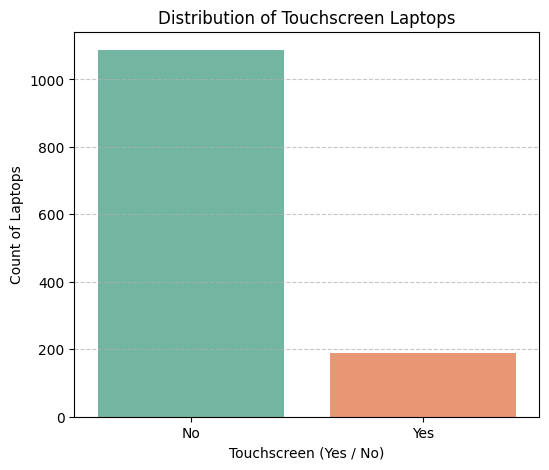

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read dataset
df = pd.read_csv("laptop_prices.csv")

plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='Touchscreen', palette='Set2')

plt.title("Distribution of Touchscreen Laptops")
plt.xlabel("Touchscreen (Yes / No)")
plt.ylabel("Count of Laptops")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving laptop_prices.csv to laptop_prices.csv


In [ ]:
import pandas as pd

df = pd.read_csv("laptop_prices.csv")
print(df.head())


  Company      Product   TypeName  Inches  Ram     OS  Weight  Price_euros  \
0   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1339.69   
1   Apple  Macbook Air  Ultrabook    13.3    8  macOS    1.34       898.94   
2      HP       250 G6   Notebook    15.6    8  No OS    1.86       575.00   
3   Apple  MacBook Pro  Ultrabook    15.4   16  macOS    1.83      2537.45   
4   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1803.60   

     Screen  ScreenW  ...  RetinaDisplay CPU_company CPU_freq      CPU_model  \
0  Standard     2560  ...            Yes       Intel      2.3        Core i5   
1  Standard     1440  ...             No       Intel      1.8        Core i5   
2   Full HD     1920  ...             No       Intel      2.5  Core i5 7200U   
3  Standard     2880  ...            Yes       Intel      2.7        Core i7   
4  Standard     2560  ...            Yes       Intel      3.1        Core i5   

  PrimaryStorage  SecondaryStorage PrimaryStorageT

In [ ]:
import pandas as pd

df = pd.read_csv("laptop_prices.csv")
print(df.columns)


Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')


In [ ]:
retina = df[df['Screen'].str.contains('Retina', case=False, na=False)]


Number of Retina display laptops: YesNoNoYesYesNoYesNoNoNoNoNoYesNoYesYesNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoN

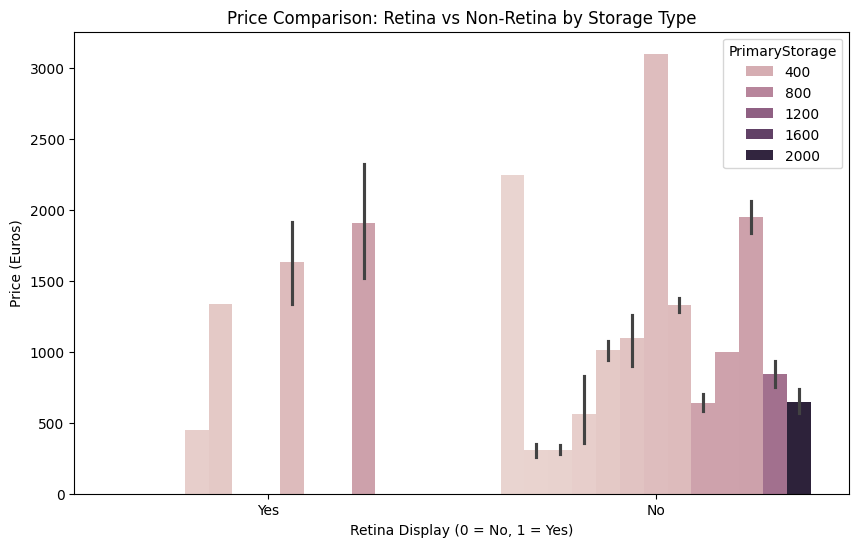

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("laptop_prices.csv")

# Count how many laptops have Retina display
print("Number of Retina display laptops:", data['RetinaDisplay'].sum())

# Compare average prices
retina_avg = data[data['RetinaDisplay'] == 1]['Price_euros'].mean()
non_retina_avg = data[data['RetinaDisplay'] == 0]['Price_euros'].mean()

print("Average Price (Retina):", retina_avg)
print("Average Price (Non-Retina):", non_retina_avg)

# Bar plot of Price vs RetinaDisplay with PrimaryStorage as hue
plt.figure(figsize=(10, 6))
sns.barplot(x='RetinaDisplay', y='Price_euros', hue='PrimaryStorage', data=data)
plt.title("Price Comparison: Retina vs Non-Retina by Storage Type")
plt.xlabel("Retina Display (0 = No, 1 = Yes)")
plt.ylabel("Price (Euros)")
plt.show()


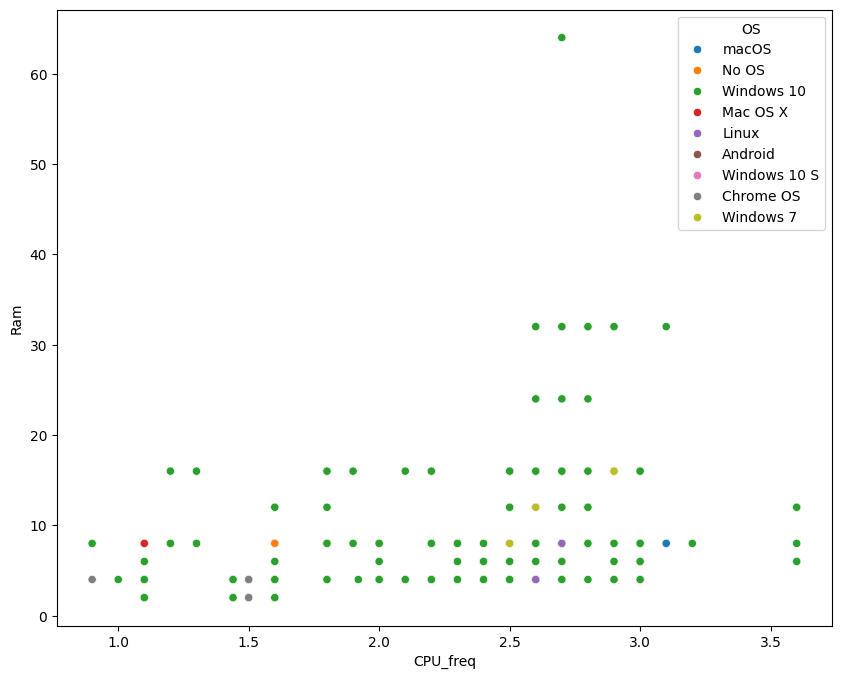

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='CPU_freq', y='Ram', hue='OS')
plt.show()
